
# Machine Learning - Driven Demand Forecasting and Supply Optimization for Instant Noodles Distribution

### Probelm Statement
The FMCG company has encountered a critical issue in its instant noodles business: a mismatch between supply and demand across different regions. In high-demand areas, supply is insufficient, leading to stockouts, while in low-demand regions, there is an oversupply, resulting in increased inventory costs and waste. This imbalance causes financial losses and operational inefficiencies, necessitating a solution to optimize supply quantities across all warehouses.



### Goal & Objective:
The objective of this exercise is to build a model, using historical data that will determine an optimum weight of the product to be shipped each time to the warehouse.

### Meta Data
##### Ware_house_ID : Unique Warehouse id where product is prepared for dispatch
##### WH_Manager_ID : Manager Id present in the warehouse
##### zone : Zone of the Warehouse
##### WH_regional_zone : Regional Zone of the warehouse
##### num_refill_req_l3m : Refilling request received by the warehouse in the last 3 months
##### transport_issue_l1y : No. of transport issued for warehouse in last 1 year
##### Competitor_in_mkt : No. of competitors in the market
##### retail_shop_num : Number of retail shops who sell noodlesproduced by the warehouse
##### wh_owner_type : The warehouse is owned by the company or it is on rent
##### distributor_num : No. of distributor who works between warehouse and retail shops
##### flood_impacted : Is the warehouse in a flood impacted area or not
##### flood_proof : Warehouse is having flood proof indicator
##### electric_supply : Does the warehouse have proper electric supply along with some power backup
##### dist_from_hub : distance from the warehouse to production hub
##### workers_num : no. workers in the warehouse
##### wh_est_year : warehouse establishment year
##### storage_issue_reported_l3m : storage issues reported by the warehouse in the last 3 months
##### govt_check_l3m : Government checking in last 3 months
##### temp_reg_mach : warehouse having temperature regulating machine indicator or not
##### approved_wh_govt_certificate : Type of approval warehouse having been issued by government
##### wh_breakdown_l3m : Number of times the warehouse faces thebreakdown in the last 3 months
##### product_wg_ton : Product weight

### Import Necessary  Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

pd.options.display.max_columns = 999

In [45]:
plt.rcParams['figure.figsize']=(7,6)
import warnings
warnings.filterwarnings('ignore')

### Load Datasets

In [11]:
df = pd.read_csv('FMCG_data.csv')

In [12]:
# display first 5 rows from train data
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


In [50]:
df.shape

(25000, 20)

In [13]:
# the dataset has 24 columns and 25000 rows

col = df.columns.to_list()

In [14]:
for i in col:
    print(df[i].unique())
    print(df[i].nunique())
    print(i)
    print()
    print()

['WH_100000' 'WH_100001' 'WH_100002' ... 'WH_124997' 'WH_124998'
 'WH_124999']
25000
Ware_house_ID


['EID_50000' 'EID_50001' 'EID_50002' ... 'EID_74997' 'EID_74998'
 'EID_74999']
25000
WH_Manager_ID


['Urban' 'Rural']
2
Location_type


['Small' 'Large' 'Mid']
3
WH_capacity_size


['West' 'North' 'South' 'East']
4
zone


['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']
6
WH_regional_zone


[3 0 1 7 8 4 6 5 2]
9
num_refill_req_l3m


[1 0 4 3 2 5]
6
transport_issue_l1y


[ 2  4  3  5  1  8  7  6 10  9 12  0]
12
Competitor_in_mkt


[ 4651  6217  4306 ...  7768  7931 10562]
4906
retail_shop_num


['Rented' 'Company Owned']
2
wh_owner_type


[24 47 64 50 42 37 38 45 35 31 40 48 26 68 16 28 58 19 49 69 32 25 46 62
 67 21 51 57 59 23 17 56 22 63 30 53 66 36 29 44 55 39 54 33 27 18 65 34
 52 43 70 60 61 41 15 20]
56
distributor_num


[0 1]
2
flood_impacted


[1 0]
2
flood_proof


[1 0]
2
electric_supply


[ 91 210 161 103 112 152  77 241 124  78 150 225  95 242 129 190 231 261
 159 189

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [18]:
df.duplicated().sum()

0

In [19]:
df.nunique().sort_values(ascending=False)

Ware_house_ID                   25000
WH_Manager_ID                   25000
retail_shop_num                  4906
product_wg_ton                   4561
dist_from_hub                     217
workers_num                        60
distributor_num                    56
storage_issue_reported_l3m         37
govt_check_l3m                     32
wh_est_year                        28
Competitor_in_mkt                  12
num_refill_req_l3m                  9
wh_breakdown_l3m                    7
transport_issue_l1y                 6
WH_regional_zone                    6
approved_wh_govt_certificate        5
zone                                4
WH_capacity_size                    3
temp_reg_mach                       2
electric_supply                     2
flood_proof                         2
Location_type                       2
wh_owner_type                       2
flood_impacted                      2
dtype: int64

In [20]:
df.drop(columns=['Ware_house_ID','WH_Manager_ID','retail_shop_num'],inplace=True)

In [21]:
df.isnull().sum()/len(df)*100

Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

In [22]:
df.drop(columns='wh_est_year',inplace=True)

In [23]:
df['workers_num'].value_counts()

workers_num
28.0    1491
27.0    1447
29.0    1402
26.0    1290
25.0    1268
24.0    1228
30.0    1202
31.0    1132
32.0    1077
23.0    1077
22.0     959
33.0     916
21.0     826
34.0     796
20.0     783
36.0     671
35.0     670
19.0     590
18.0     559
37.0     506
17.0     445
39.0     419
38.0     417
40.0     381
16.0     328
42.0     298
41.0     240
43.0     212
44.0     204
45.0     175
15.0     155
14.0     104
46.0      91
50.0      73
48.0      71
49.0      65
55.0      50
47.0      47
53.0      45
56.0      40
54.0      39
51.0      30
52.0      29
13.0      24
57.0      24
58.0      20
12.0      15
61.0      14
60.0      10
10.0       5
78.0       5
98.0       5
62.0       5
92.0       5
65.0       5
64.0       5
72.0       5
11.0       5
67.0       5
63.0       5
Name: count, dtype: int64

In [24]:
df['workers_num']=df['workers_num'].fillna(df['workers_num'].mode()[0])

In [25]:
df['workers_num'].mode()

0    28.0
Name: workers_num, dtype: float64

In [26]:
df.groupby(by='approved_wh_govt_certificate')[['product_wg_ton']].mean()

,product_wg_ton
approved_wh_govt_certificate,
A,24122.532220
A+,26717.947984
B,21259.281588
B+,21456.008338
C,20938.889293


In [29]:
df[df['approved_wh_govt_certificate']=='A'][['workers_num']].describe()

,workers_num
count,4671.000000
mean,28.779705
std,7.640649
min,10.000000
25%,24.000000
50%,28.000000
75%,33.000000
max,98.000000


In [30]:
df[df['approved_wh_govt_certificate']=='A+'][['workers_num']].describe()

,workers_num
count,4191.000000
mean,28.844429
std,7.670272
min,11.000000
25%,24.000000
50%,28.000000
75%,33.000000
max,92.000000


In [31]:
df[df['approved_wh_govt_certificate']=='B'][['product_wg_ton']].describe()

,product_wg_ton
count,4812.000000
mean,21259.281588
std,10452.610063
min,4057.000000
25%,13055.750000
50%,21129.000000
75%,28138.000000
max,51131.000000


In [32]:
df['approved_wh_govt_certificate'].value_counts()

approved_wh_govt_certificate
C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: count, dtype: int64

In [33]:
df['approved_wh_govt_certificate']=df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0])

In [34]:
df.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [35]:
df.select_dtypes(include=np.number).columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [36]:
df['product_wg_ton'].describe()

count    25000.000000
mean     22102.632920
std      11607.755077
min       2065.000000
25%      13059.000000
50%      22101.000000
75%      30103.000000
max      55151.000000
Name: product_wg_ton, dtype: float64

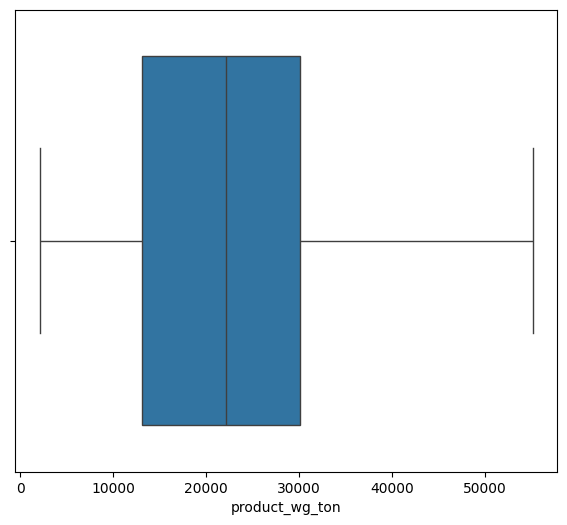

In [48]:
sns.boxplot(x=df['product_wg_ton'])
plt.show()

In [38]:
df['flood_impacted']=df['flood_impacted'].astype('object')
df['flood_proof']=df['flood_proof'].astype('object')
df['electric_supply']=df['electric_supply'].astype('object')
df['temp_reg_mach']=df['temp_reg_mach'].astype('object')

In [39]:
df.select_dtypes(include=np.number).columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'distributor_num', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

# Data Analysis and Visualization

In [52]:
df.nunique()

Location_type                      2
WH_capacity_size                   3
zone                               4
WH_regional_zone                   6
num_refill_req_l3m                 9
transport_issue_l1y                6
Competitor_in_mkt                 12
wh_owner_type                      2
distributor_num                   56
flood_impacted                     2
flood_proof                        2
electric_supply                    2
dist_from_hub                    217
workers_num                       60
storage_issue_reported_l3m        37
temp_reg_mach                      2
approved_wh_govt_certificate       5
wh_breakdown_l3m                   7
govt_check_l3m                    32
product_wg_ton                  4561
dtype: int64

In [53]:
# univariate and bivariate analysis

In [54]:
df.groupby(by='Location_type')[['product_wg_ton']].mean()

,product_wg_ton
Location_type,
Rural,21844.430108
Urban,25004.033774


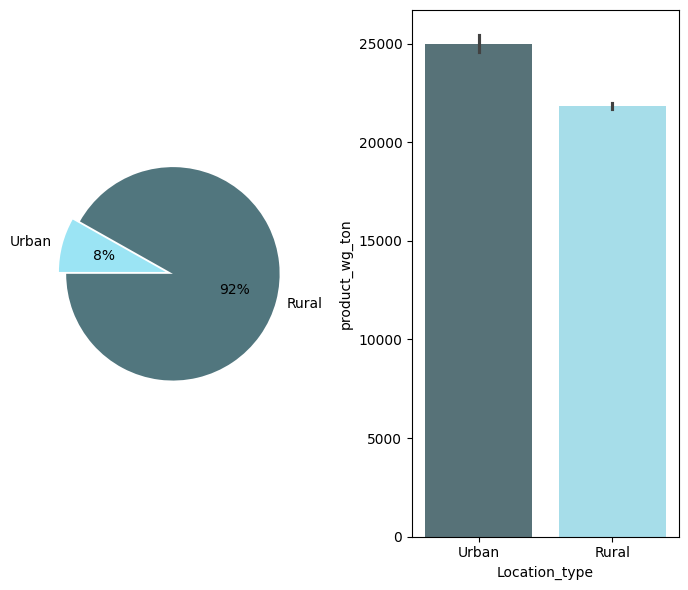

In [55]:
plt.subplot(1,2,1)
df['Location_type'].value_counts().plot(kind='pie',colors = ['#51767e', '#9be4f4'], autopct='%1.0f%%', explode=(0.02, 0.05),
    startangle=180, ylabel=' ', labels = ['Rural', 'Urban'])
plt.subplot(1,2,2)
sns.barplot(x=df['Location_type'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4'])
plt.tight_layout()

* Location_type
    * The pie chart shows that 92% of data points are under rural category and only 8% are under urban category.This indicates that a majority of observations are under rural category.
    * The bivariate analysis between Location_type and the target variable product_wg_ton shows that the Urban category has a higher average of product_wg_ton compared to the Rural category.
    * This suggests that product weight is generally higher in urban locations than in rural ones, even though urban areas constitute only 8.17% of the data.

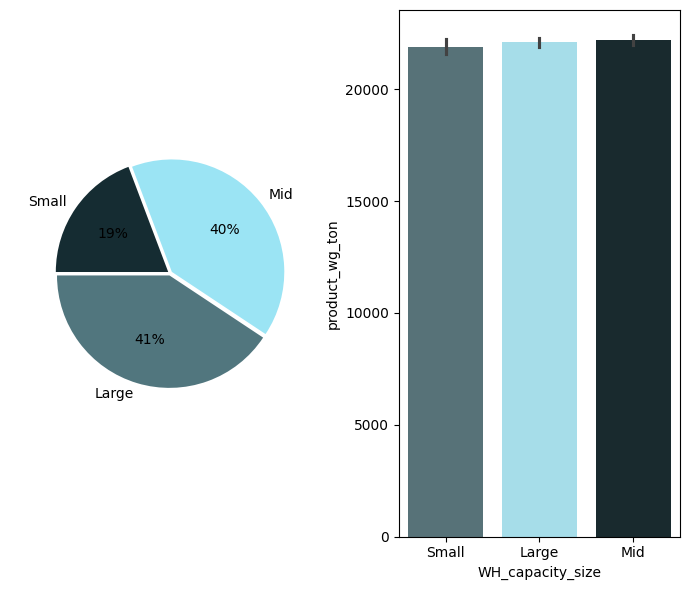

In [56]:
plt.subplot(1,2,1)
df['WH_capacity_size'].value_counts().plot(kind='pie',colors = ['#51767e', '#9be4f4','#152c32'], autopct='%1.0f%%', explode=(0.02, 0.02,0.02),
    startangle=180, ylabel=' ', labels = ['Large', 'Mid','Small'])
plt.subplot(1,2,2)
sns.barplot(x=df['WH_capacity_size'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32'])
plt.tight_layout()

* WH_capacity_size
    * The pie chart shows that Mid(40%) and Large(41%) warehouses are almost equal and are more common in the data, with Small(19%) warehouses being less common.
    * The bivariate analysis between WH_capacity_size and the target variable product_wg_ton shows that the average product weight is almost equal across all warehouse capacity sizes (Small, Mid, and Large).
    * This suggests that warehouse size may not have a strong influence on the average product weight.

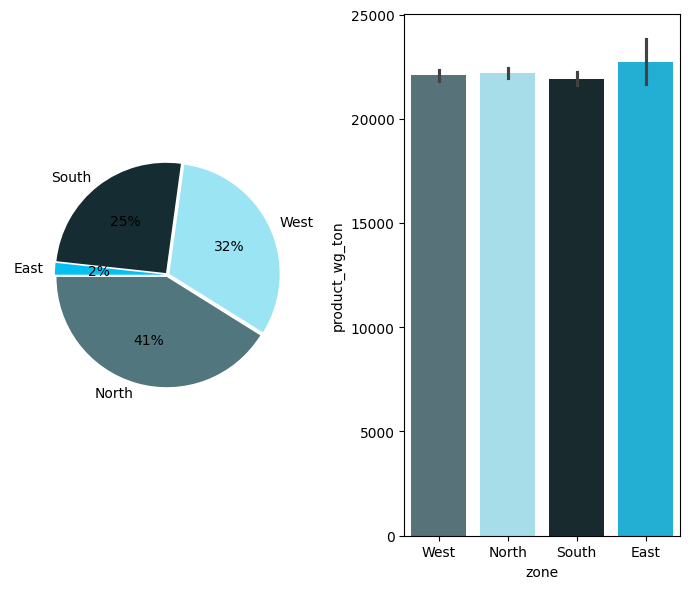

In [57]:
plt.subplot(1,2,1)
df['zone'].value_counts().plot(kind='pie',colors = ['#51767e', '#9be4f4','#152c32','#04c0f1'], autopct='%1.0f%%', explode=(0.02, 0.02,0.02,0.02),
    startangle=180, ylabel=' ', labels = ['North', 'West','South','East'])
plt.subplot(1,2,2)
sns.barplot(x=df['zone'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'])
plt.tight_layout()

- Zone
    * The pie chart shows that North(41%) zone is represented by majority of data in the dataset followed by West(32%) and then South(25%). The East zone has a very small representation of only 2%.
    * The bivariate analysis between zone and the target variable product_wg_ton shows that East zone has a higher average of product_wg_ton even though it has a very small represention. This is followed by North zone. The west and south zones have slightly similar averages which are less.
    * This suggests that, zone does not have a large impact, but it may still have some influence on the average product weight, particularly for the East zone.

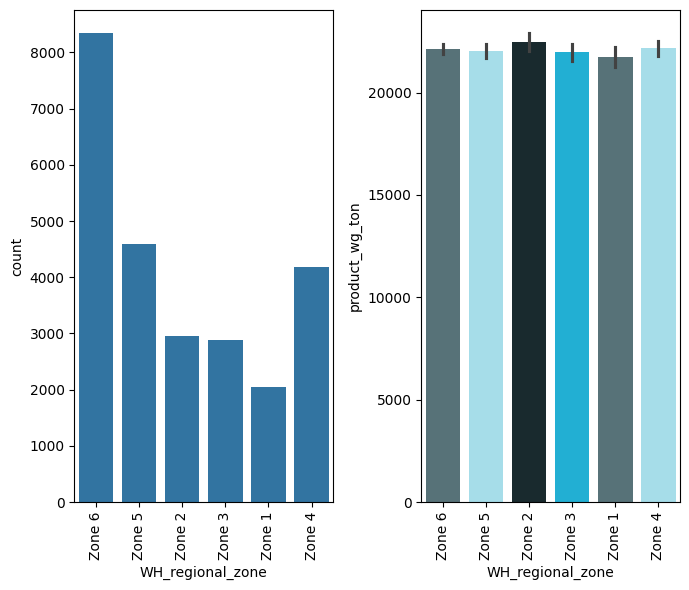

In [62]:
plt.figure.figsize=(3,5)
plt.subplot(1,2,1)
sns.countplot(x=df['WH_regional_zone'])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x=df['WH_regional_zone'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'])
plt.xticks(rotation=90)
plt.tight_layout()

* WH_regional_zone
    * The count plot shows that a large proportion of data belongs to zone 6 followed by zone 5 and zone 4.   Zone 2, zone 3 and Zone 1 have lower proprtions where zone 1 is the least.
    * The bivariate analysis between WH_regional_zone and the target variable product_wg_ton shows that all zones appear to have similar averages of product_wg_ton with only minor variations.
    * This shows that each zone contributes similarly in terms of product weight, despite of differences in count indicating that zones with lesser records have higher average weights per record.

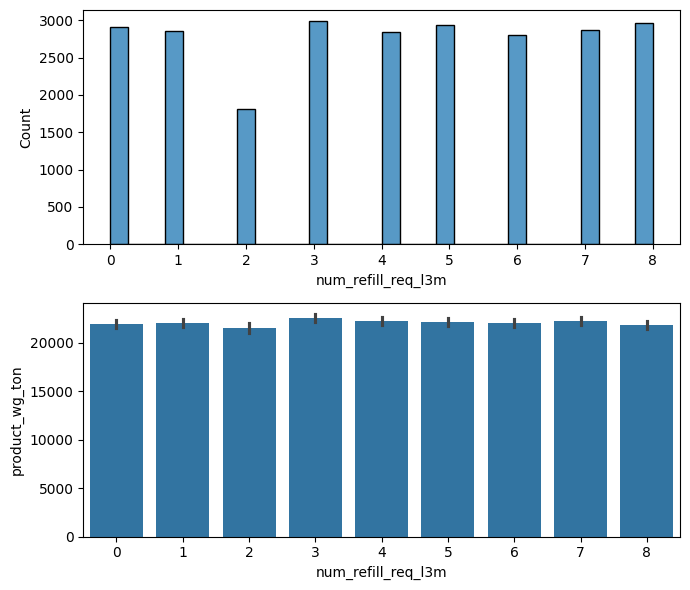

In [63]:
plt.figure.figsize=(3,5)
plt.subplot(2,1,1)
sns.histplot(x=df['num_refill_req_l3m'])
plt.subplot(2,1,2)
sns.barplot(x=df['num_refill_req_l3m'],y=df['product_wg_ton'])
plt.tight_layout()

* num_refill_req_l3m
    * The count plot shows that most values are evenly distributed. Whereas value '2' has a lower proportion when compared to others.
    * The bivariate analysis between num_refill_req_l3m and the target variable product_wg_ton shows that there are minor differences, with some counts having slightly higher or lower averages, but overall, there is no significant difference across the categories.
    * This shows that the average product weight (product_wg_ton) does not vary much across different refill request counts, indicating that the number of refill requests in the last three months does not strongly impact the product weight.

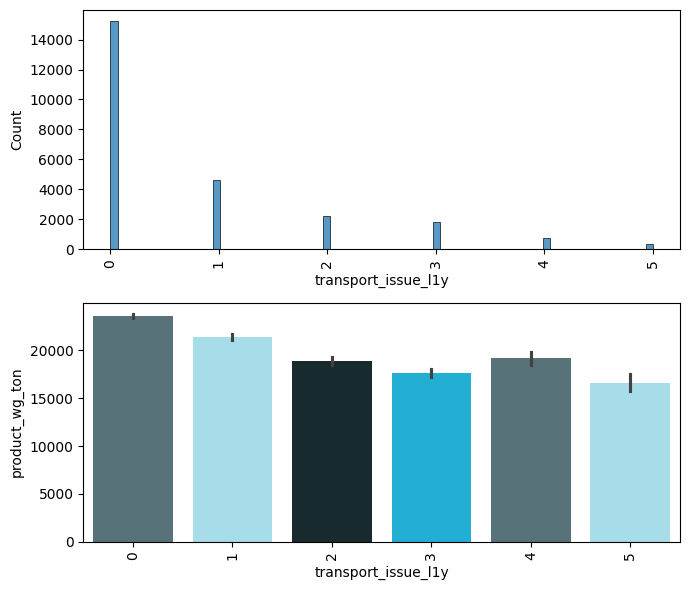

In [60]:
plt.figure.figsize=(3,5)
plt.subplot(2,1,1)
sns.histplot(x=df['transport_issue_l1y'])
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.barplot(x=df['transport_issue_l1y'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'])
plt.xticks(rotation=90)
plt.tight_layout()

* transport_issue_l1y
    * The univariate bar chart shows that the majority of the data points have a transport issue level of 0, indicating no transport issues, with a count significantly higher than other levels. Level 1 follows, while levels 2, 3, 4, and 5 have much lower counts, with level 5 being the least common.
    * The bivariate analysis between transport_issue_l1y and product_wg_ton indicates that records with lower transport issue levels (especially level 0) tend to have higher average product weights. As the transport issue level increases, the average product weight generally decreases, with level 5 showing the lowest average.
    * This suggests that products associated with fewer transport issues tend to have higher weights, whereas those with more issues tend to be lighter, possibly indicating a correlation between transport reliability and product weight.

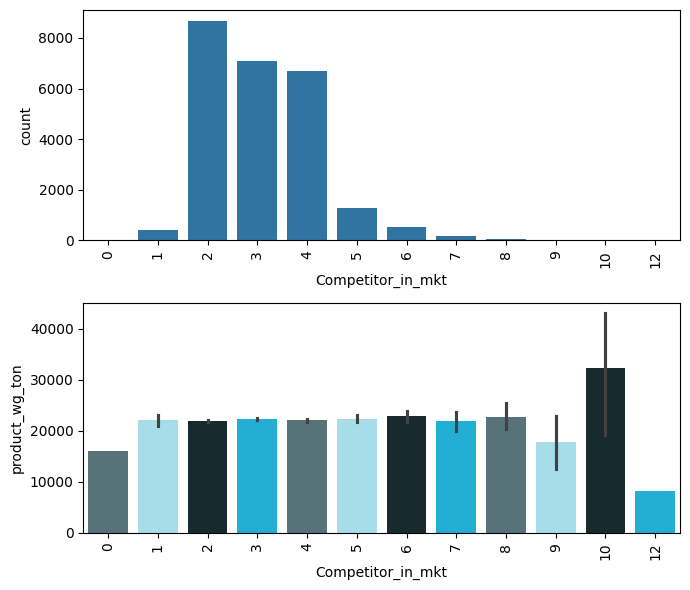

In [61]:
plt.figure.figsize=(3,5)
plt.subplot(2,1,1)
sns.countplot(x=df['Competitor_in_mkt'])
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.barplot(x=df['Competitor_in_mkt'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'])
plt.xticks(rotation=90)
plt.tight_layout()

* Competitor_in_mkt
    * The univariate bar chart shows that most data points have between 2 to 4 competitors in the market, with 2 being the most common. Few data points have more than 5 competitors, with levels 10 and 12 having the least counts.
    * The bivariate analysis between Competitor_in_mkt and product_wg_ton reveals that most competitor levels have similar average product weights, except for level 10, which shows a noticeably higher average weight and variability.
    * This suggests that in markets with fewer competitors, product weight remains relatively stable, while certain competitor levels like 10 might involve different product characteristics or strategies, leading to higher average weights.

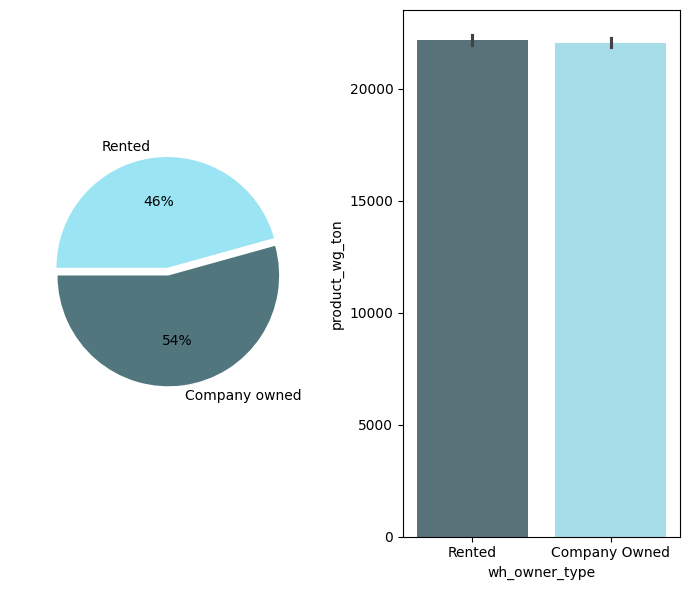

In [64]:
plt.subplot(1,2,1)
df['wh_owner_type'].value_counts().plot(kind='pie',colors = ['#51767e', '#9be4f4'], autopct='%1.0f%%', explode=(0.02, 0.05),
    startangle=180, ylabel=' ', labels = ['Company owned', 'Rented'])
plt.subplot(1,2,2)
sns.barplot(x=df['wh_owner_type'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4'])
plt.tight_layout()

* WH_owner_type
    * The pie chart reveals that 54% of the warehouses are company-owned, while 46% are rented, indicating a slightly higher preference or occurrence of company-owned warehouses over rented ones.
    * The bivariate analysis between WH_owner_type and the target variable product_wg_ton shows that both rented and company-owned warehouses have similar average values for product_wg_ton, with only a small difference between them.
    * This suggests that the type of ownership (rented or company-owned) does not significantly affect the product weight in tons, as both ownership types contribute similarly in terms of product weight.

In [65]:
df['wh_owner_type']

0               Rented
1        Company Owned
2        Company Owned
3               Rented
4        Company Owned
             ...      
24995           Rented
24996    Company Owned
24997           Rented
24998           Rented
24999    Company Owned
Name: wh_owner_type, Length: 25000, dtype: object

In [66]:
df['distributor_num']=df['distributor_num'].astype('int')

In [67]:
df['distributor_num'].unique()

array([24, 47, 64, 50, 42, 37, 38, 45, 35, 31, 40, 48, 26, 68, 16, 28, 58,
       19, 49, 69, 32, 25, 46, 62, 67, 21, 51, 57, 59, 23, 17, 56, 22, 63,
       30, 53, 66, 36, 29, 44, 55, 39, 54, 33, 27, 18, 65, 34, 52, 43, 70,
       60, 61, 41, 15, 20])

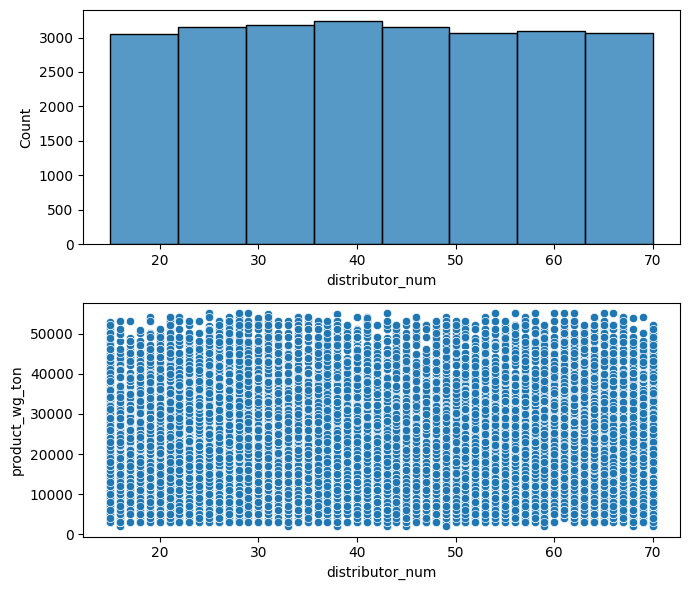

In [68]:
plt.figure.figsize=(3,5)
plt.subplot(2,1,1)
sns.histplot(x=df['distributor_num'],bins=8)
plt.xticks()
plt.subplot(2,1,2)
sns.scatterplot(x=df['distributor_num'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'])
plt.xticks()
plt.tight_layout()

In [69]:
for i in range(0,len(df)):
    if df.loc[i,'distributor_num']<=10:
        df.loc[i,'Encoded_distributer']='Below 10'
    elif df.loc[i,'distributor_num']>10 and df.loc[i,'distributor_num']<21:
        df.loc[i,'Encoded_distributer']='11 to 20'
    elif df.loc[i,'distributor_num']>20 and df.loc[i,'distributor_num']<31:
        df.loc[i,'Encoded_distributer']='21 to 30'
    elif df.loc[i,'distributor_num']>30 and df.loc[i,'distributor_num']<41:
        df.loc[i,'Encoded_distributer']='31 to 40'
    elif df.loc[i,'distributor_num']>40 and df.loc[i,'distributor_num']<51:
        df.loc[i,'Encoded_distributer']='41 to 50'
    elif df.loc[i,'distributor_num']>50 and df.loc[i,'distributor_num']<61:
        df.loc[i,'Encoded_distributer']='51 to 60'
    else :
        df.loc[i,'Encoded_distributer']='Above 60'

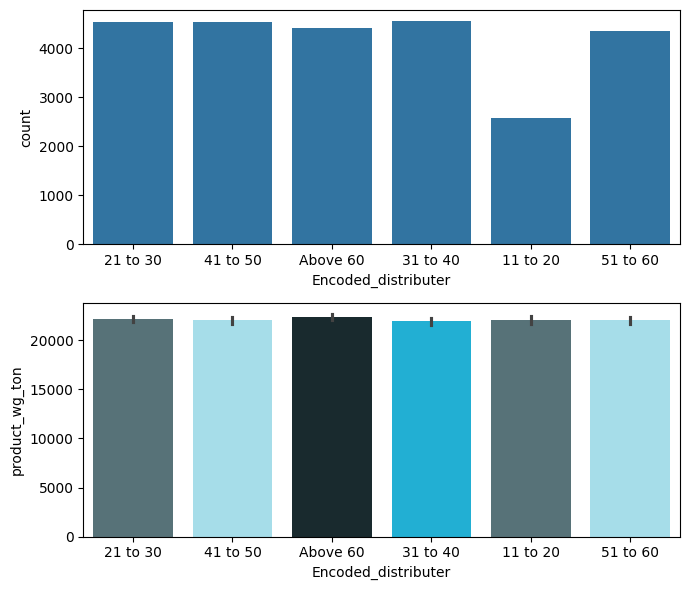

In [70]:
plt.figure.figsize=(3,5)
plt.subplot(2,1,1)
sns.countplot(x=df['Encoded_distributer'])
plt.xticks()
plt.subplot(2,1,2)
sns.barplot(x=df['Encoded_distributer'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'])
plt.xticks()
plt.tight_layout()

* Encoded_distributer
    * The univariate bar chart shows that the majority of data points fall into the 21 to 30 category, followed by 41 to 50 and Above 60. The 11 to 20 category has the fewest entries.
    * The bivariate analysis between Encoded_distributer and product_wg_ton shows that all distributor categories have similar average product weights, with only minor variations across categories.
    * This suggests that distributor categories contribute similarly in terms of product weight, indicating that distribution groups are not a major differentiating factor for product weight.

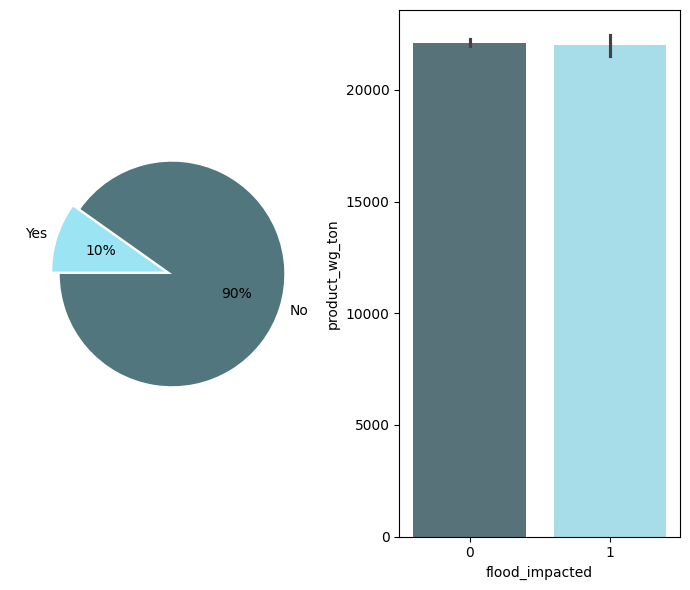

In [71]:
plt.subplot(1,2,1)
df['flood_impacted'].value_counts().plot(kind='pie',colors = ['#51767e', '#9be4f4'], autopct='%1.0f%%', explode=(0.02, 0.05),
    startangle=180, ylabel=' ', labels = ['No', 'Yes'])
plt.subplot(1,2,2)
sns.barplot(x=df['flood_impacted'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4'])
plt.tight_layout()

* flood_impacted
    * The pie chart shows that only 10% of the warehouses are in flood impacted area, while the remaining 90% are not. This indicates that only few warehouses are present in the flood impacted area.
    * The bivariate analysis between flood_impacted and the target variable product_wg_ton reveals that both warehouses present in flood impacted area and warehouses that are not present in flood impacted area have similar average product_wg_ton values, with only a minimal difference.
    * This suggests that flood_impacted does not significantly impact the average product weight handled by the warehouses.

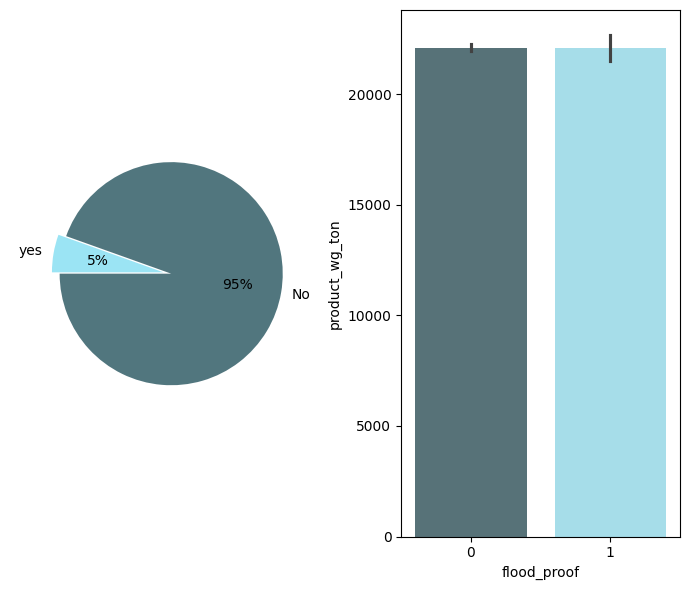

In [72]:
plt.subplot(1,2,1)
df['flood_proof'].value_counts().plot(kind='pie',colors = ['#51767e', '#9be4f4'], autopct='%1.0f%%', explode=(0.02, 0.05),
    startangle=180, ylabel=' ', labels = ['No', 'yes'])
plt.subplot(1,2,2)
sns.barplot(x=df['flood_proof'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4'])
plt.tight_layout()

* flood_proof
    * The pie chart shows that only 5% of the warehouses have flood-proof indicator, while the remaining 95% do not have flood proof indicator. This indicates that flood-proofing is relatively rare among the warehouses.
    * The bivariate analysis between flood_proof and the target variable product_wg_ton reveals that both flood-proof and non-flood-proof warehouses have similar average product_wg_ton values, with only a minimal difference.
    * This suggests that flood-proofing does not significantly impact the average product weight handled by the warehouses.

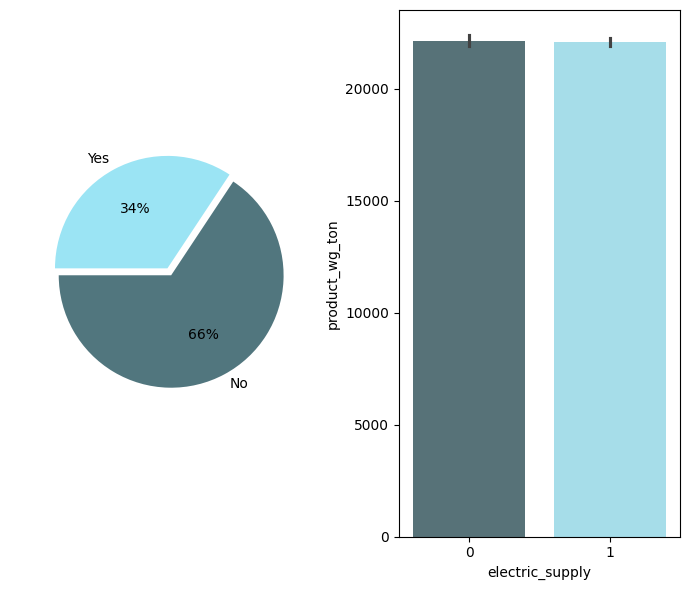

In [73]:
plt.subplot(1,2,1)
df['electric_supply'].value_counts().plot(kind='pie',colors = ['#51767e', '#9be4f4'], autopct='%1.0f%%', explode=(0.02, 0.05),
    startangle=180, ylabel=' ', labels = ['No', 'Yes'])
plt.subplot(1,2,2)
sns.barplot(x=df['electric_supply'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4'])
plt.tight_layout()

* electric_supply
    * The pie chart shows that 34% of the warehouses have proper electric supply along with some power backup, while the remaining 66% do not have proper electric supply. This indicates that most of the warehouses do not have proper power supply.
    * The bivariate analysis between electric_supply and the target variable product_wg_ton reveals that both warehouses with electric supply and warehouses without proper electric supply have similar average product_wg_ton values, with only a minimal difference.
    * This suggests that electric supply does not significantly impact the average product weight handled by the warehouses.

In [74]:
df['dist_from_hub']

0         91
1        210
2        161
3        103
4        112
        ... 
24995    142
24996    130
24997    147
24998     60
24999    239
Name: dist_from_hub, Length: 25000, dtype: int64

In [75]:
df['Encoded_dist_from_hub']=' '

In [76]:
for i in range(0,len(df)):
    if df.loc[i,'dist_from_hub']<=50:
        df.loc[i,'Encoded_dist_from_hub']='Below 50'
    elif df.loc[i,'dist_from_hub']>50 and df.loc[i,'dist_from_hub']<101:
        df.loc[i,'Encoded_dist_from_hub']='50 to 100'
    elif df.loc[i,'dist_from_hub']>100 and df.loc[i,'dist_from_hub']<151:
        df.loc[i,'Encoded_dist_from_hub']='100 to 150'
    elif df.loc[i,'dist_from_hub']>150 and df.loc[i,'dist_from_hub']<201:
        df.loc[i,'Encoded_dist_from_hub']='150 to 200'
    elif df.loc[i,'dist_from_hub']>200 and df.loc[i,'dist_from_hub']<251:
        df.loc[i,'Encoded_dist_from_hub']='200 to 250'
    elif df.loc[i,'dist_from_hub']>250 and df.loc[i,'dist_from_hub']<301:
        df.loc[i,'Encoded_dist_from_hub']='250 to 300'
    else :
        df.loc[i,'Encoded_dist_from_hub']='Above 300'

In [77]:
df.groupby(by='Encoded_dist_from_hub')[['product_wg_ton']].mean()

,product_wg_ton
Encoded_dist_from_hub,
100 to 150,21989.420194
150 to 200,22268.176963
200 to 250,22084.990360
250 to 300,21824.688664
50 to 100,22196.950641


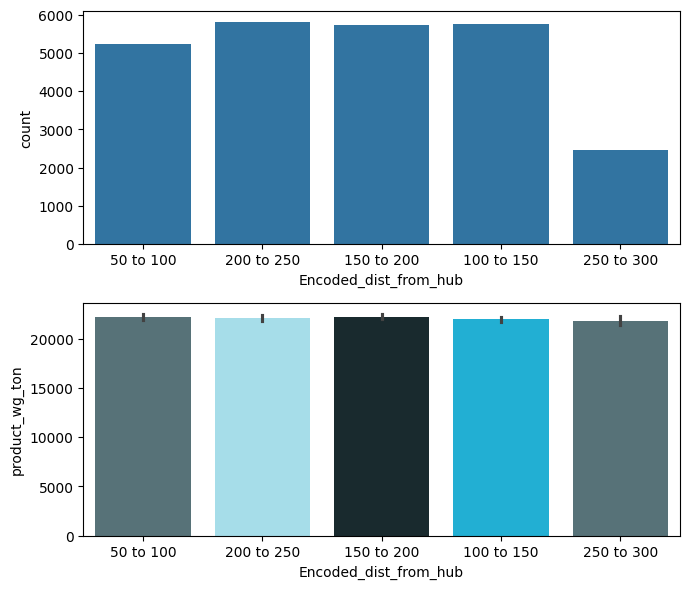

In [78]:
plt.figure.figsize=(3,5)
plt.subplot(2,1,1)
sns.countplot(x=df['Encoded_dist_from_hub'])
plt.xticks()
plt.subplot(2,1,2)
sns.barplot(x=df['Encoded_dist_from_hub'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'])
plt.xticks()
plt.tight_layout()

* Encoded_dist_from_hub
    * The univariate analysis shows that most data points belong to the 150 to 200, 100 to 150, and 200 to 250 distance ranges, each having around 5000 to 5500 counts. The 50 to 100 range follows with a similar count, while the 250 to 300 range has the lowest count, significantly fewer than the other ranges.
    * The bivariate analysis between Encoded_dist_from_hub and product_wg_ton indicates that the average product weight in tons is relatively consistent across different distance ranges, showing minimal variation.
    * This suggests that distance from the hub does not significantly impact the average product weight, though more data points are concentrated in certain distance ranges.

In [79]:
df['Encoded_worker_num']=''

In [80]:
for i in range(0,len(df)):
    if df.loc[i,'workers_num']<=10:
        df.loc[i,'Encoded_worker_num']='Below 10'
    elif df.loc[i,'workers_num']>10 and df.loc[i,'workers_num']<21:
        df.loc[i,'Encoded_worker_num']='11 to 20'
    elif df.loc[i,'workers_num']>20 and df.loc[i,'workers_num']<31:
        df.loc[i,'Encoded_worker_num']='21 to 30'
    elif df.loc[i,'workers_num']>30 and df.loc[i,'workers_num']<41:
        df.loc[i,'Encoded_worker_num']='31 to 40'
    elif df.loc[i,'workers_num']>40 and df.loc[i,'workers_num']<51:
        df.loc[i,'Encoded_worker_num']='41 to 50'
    elif df.loc[i,'workers_num']>50 and df.loc[i,'workers_num']<61:
        df.loc[i,'Encoded_worker_num']='51 to 60'
    else :
        df.loc[i,'Encoded_worker_num']='Above 60'

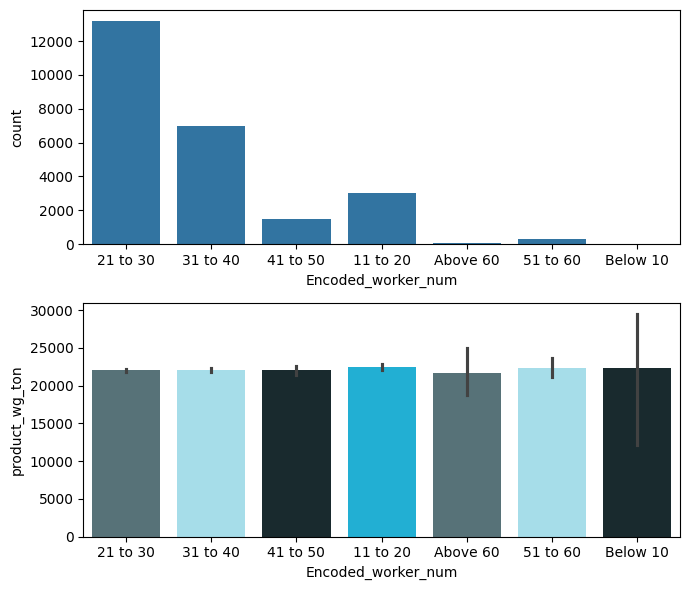

In [81]:
plt.figure.figsize=(3,5)
plt.subplot(2,1,1)
sns.countplot(x=df['Encoded_worker_num'])
plt.xticks()
plt.subplot(2,1,2)
sns.barplot(x=df['Encoded_worker_num'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'])
plt.xticks()
plt.tight_layout()

* Encoded_worker_num
    * The univariate analysis reveals that most data falls in the 21 to 30 worker range, followed by the 31 to 40 range. Other ranges, such as 11 to 20 and 41 to 50, have considerably lower counts, while ranges like Above 60, 51 to 60, and Below 10 have minimal counts.
    * The bivariate analysis between Encoded_worker_num and product_wg_ton shows that the average product weight in tons is also relatively consistent across the different worker number ranges. However, there is a slight increase in variability for categories like "Below 10" and "Above 60."
    * This indicates that the number of workers does not strongly influence the average product weight, although most data points fall within the 21 to 40 worker range.

In [82]:
df['Encoded_storage_issue']=' '

In [83]:
for i in range(0,len(df)):
    if df.loc[i,'storage_issue_reported_l3m']<=10:
        df.loc[i,'Encoded_storage_issue']='Below 10'
    elif df.loc[i,'storage_issue_reported_l3m']>10 and df.loc[i,'storage_issue_reported_l3m']<21:
        df.loc[i,'Encoded_storage_issue']='11 to 20'
    elif df.loc[i,'storage_issue_reported_l3m']>20 and df.loc[i,'storage_issue_reported_l3m']<31:
        df.loc[i,'Encoded_storage_issue']='21 to 30'
    elif df.loc[i,'storage_issue_reported_l3m']>30 and df.loc[i,'storage_issue_reported_l3m']<41:
        df.loc[i,'Encoded_storage_issue']='31 to 40'
    else :
        df.loc[i,'Encoded_storage_issue']='Above 40'

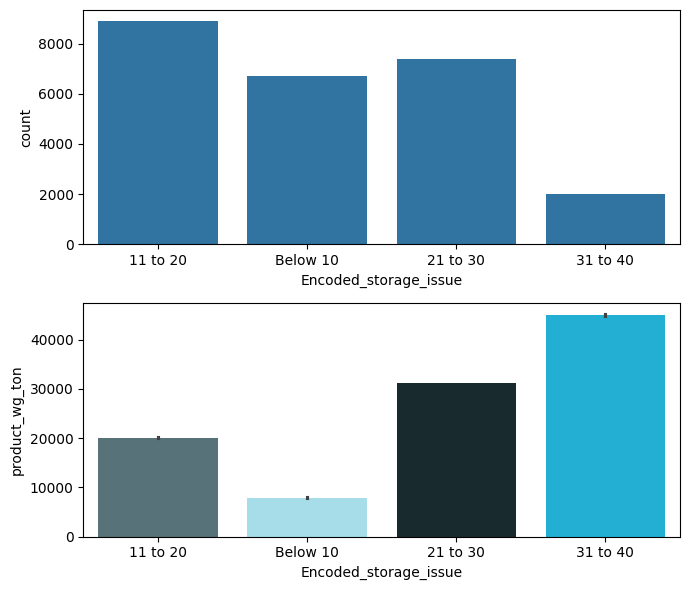

In [84]:
plt.figure.figsize=(3,5)
plt.subplot(2,1,1)
sns.countplot(x=df['Encoded_storage_issue'])
plt.xticks()
plt.subplot(2,1,2)
sns.barplot(x=df['Encoded_storage_issue'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'])
plt.xticks()
plt.tight_layout()

* Encoded_storage_issue
    * The univariate analysis shows that the majority of data points fall in the 11 to 20 and 21 to 30 storage issue ranges, with counts around 8000 and 7000, respectively. The Below 10 range also has a substantial count, while the 31 to 40 range has the lowest count, much lower than the other categories.
    * The bivariate analysis between Encoded_storage_issue and product_wg_ton reveals that the average product weight in tons varies significantly across storage issue categories. The 31 to 40 range has the highest average product weight, followed by 21 to 30 and 11 to 20, with Below 10 showing the lowest average weight.
    * This indicates that higher storage issue values (31 to 40) are associated with a greater average product weight, while lower values (Below 10) are linked to a much lower average product weight.

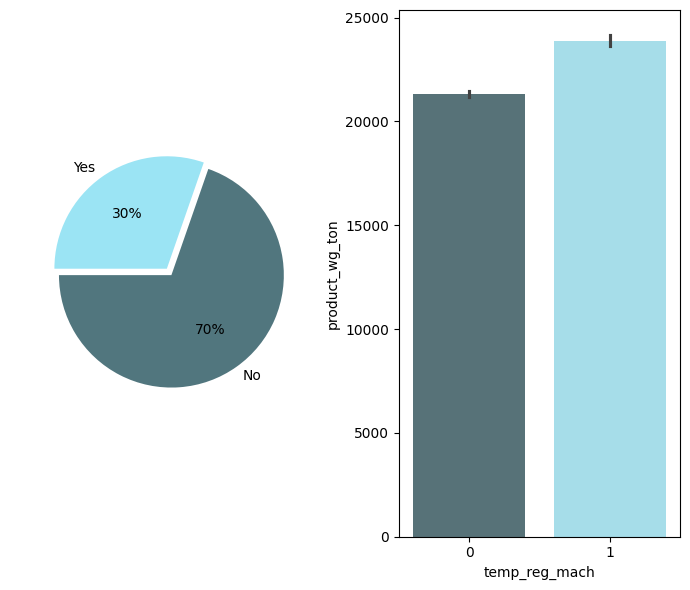

In [86]:
plt.subplot(1,2,1)
df['temp_reg_mach'].value_counts().plot(kind='pie',colors = ['#51767e', '#9be4f4'], autopct='%1.0f%%', explode=(0.02, 0.05),
    startangle=180, ylabel=' ', labels = ['No', 'Yes'])
plt.subplot(1,2,2)
sns.barplot(x=df['temp_reg_mach'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4'])
plt.tight_layout()

* temp_reg_mach
    * The pie chart shows that 70% of the warehouses do not have a temperature regulation machine, while 30% are equipped with one. This suggests that the majority of warehouses operate without temperature control.
    * The bivariate analysis between temp_reg_mach and the target variable product_wg_ton indicates that warehouses with temperature regulation machines have a higher average product_wg_ton compared to those without.
    * This suggests that temperature-regulated warehouses handle a higher product weight, possibly due to specific storage requirements for certain products.

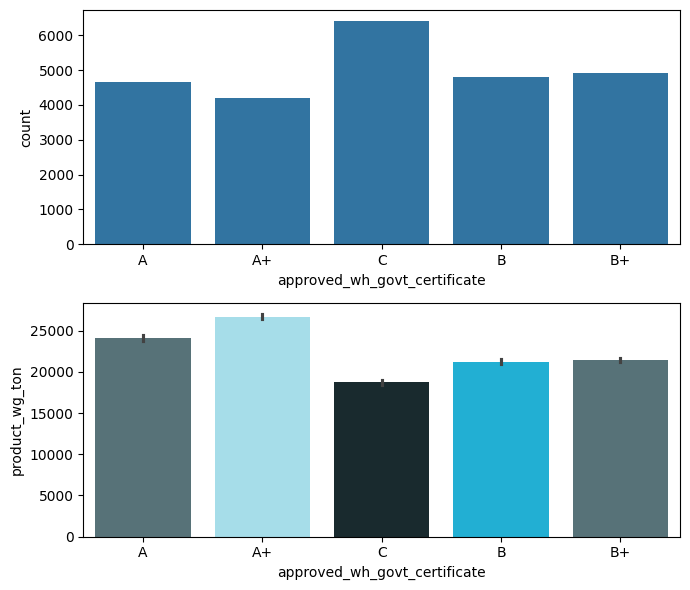

In [87]:
plt.figure.figsize=(3,5)
plt.subplot(2,1,1)
sns.countplot(x=df['approved_wh_govt_certificate'])
plt.xticks()
plt.subplot(2,1,2)
sns.barplot(x=df['approved_wh_govt_certificate'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'])
plt.xticks()
plt.tight_layout()

* approved_wh_govt_certificate
    * The univariate analysis shows that most warehouses have a "C" certificate, followed by a balanced distribution across "A," "A+," "B," and "B+" certificates.
    * The bivariate analysis between approved_wh_govt_certificate and product_wg_ton indicates that "A+" warehouses have a slightly higher average product weight, followed by "A," "B," "B+," and "C," which has the lowest average.
    * This suggests that despite having the highest count, "C" certified warehouses tend to handle a lower average product weight compared to other certification levels.

In [88]:
df['wh_breakdown_l3m'].value_counts()

wh_breakdown_l3m
2    5076
3    5006
4    4037
6    4012
5    3925
1    2036
0     908
Name: count, dtype: int64

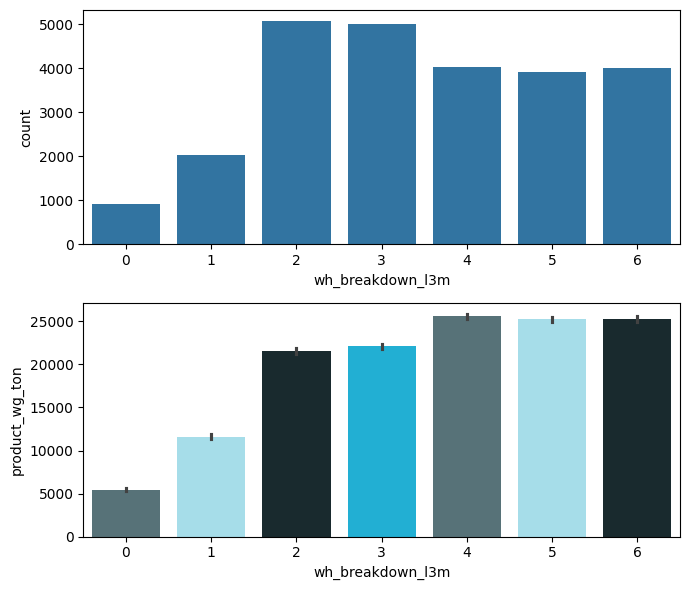

In [89]:
plt.figure.figsize=(3,5)
plt.subplot(2,1,1)
sns.countplot(x=df['wh_breakdown_l3m'])
plt.xticks()
plt.subplot(2,1,2)
sns.barplot(x=df['wh_breakdown_l3m'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'])
plt.xticks()
plt.tight_layout()


* wh_breakdown_l3m
    * The univariate analysis shows that most warehouses have experienced 2 to 3 breakdowns in the last 3 months, with fewer breakdowns seen in higher and lower categories.
    * The bivariate analysis between wh_breakdown_l3m and product_wg_ton reveals that warehouses with 2-6 breakdowns maintain similar average product weights, whereas warehouses with 0 or 1 breakdown have noticeably lower average weights.
    * This indicates that warehouses experiencing more breakdowns still handle a substantial average weight, while warehouses with fewer breakdowns may handle lighter weights on average.

In [90]:
df['Encoded_govt_check']=' '

In [91]:
for i in range(0,len(df)):
    if df.loc[i,'govt_check_l3m']<=10:
        df.loc[i,'Encoded_govt_check']='Below 10'
    elif df.loc[i,'govt_check_l3m']>10 and df.loc[i,'govt_check_l3m']<21:
        df.loc[i,'Encoded_govt_check']='11 to 20'
    elif df.loc[i,'govt_check_l3m']>20 and df.loc[i,'govt_check_l3m']<31:
        df.loc[i,'Encoded_govt_check']='21 to 30'
    else :
        df.loc[i,'Encoded_govt_check']='Above 30'

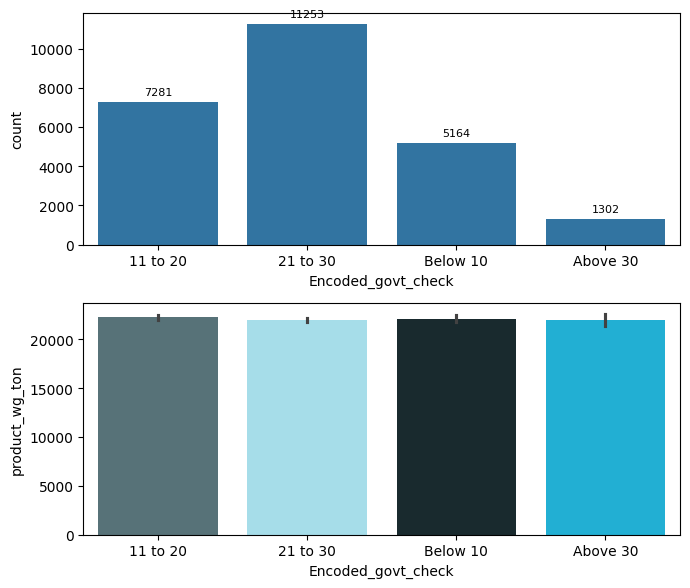

In [92]:
plt.figure.figsize=(3,5)
plt.subplot(2,1,1)
x=sns.countplot(x=df['Encoded_govt_check'])
for p in x.patches:
    x.annotate(f'{round(p.get_height())}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks()
plt.subplot(2,1,2)
sns.barplot(x=df['Encoded_govt_check'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'])
plt.xticks()
plt.tight_layout()

* Encoded_govt_check
    * The univariate analysis shows that most warehouses fall in the 21 to 30 category, followed by the 11 to 20 category. Fewer warehouses fall into the Below 10 category, and very few are in the Above 30 category.
    * The bivariate analysis between Encoded_govt_check and product_wg_ton indicates that all categories have similar average product weights, with only minor variations.
    * This suggests that regardless of the encoded government check frequency, warehouses handle similar product weights on average.

In [93]:
df.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton', 'Encoded_distributer', 'Encoded_dist_from_hub',
       'Encoded_worker_num', 'Encoded_storage_issue', 'Encoded_govt_check'],
      dtype='object')

In [94]:
# Encoding

In [95]:
df['Location_type']=df['Location_type'].replace({'Rural':0,'Urban':1})
df['WH_capacity_size']=df['WH_capacity_size'].replace({'Small':0,'Mid':1,'Large':2})
df=pd.get_dummies(data=df,columns=['zone','WH_regional_zone'],dtype='int')
df['wh_owner_type']=df['wh_owner_type'].replace({'Rented':0,'Company Owned':1})
df['approved_wh_govt_certificate']=df['approved_wh_govt_certificate'].replace({'A+':0,'A':1,'B+':2,'B':3,'C':4})

In [96]:
df['approved_wh_govt_certificate'].unique()

array([1, 0, 4, 3, 2], dtype=int64)

In [97]:
df['num_refill_req_l3m']=df['num_refill_req_l3m'].astype('int')
df['transport_issue_l1y']=df['transport_issue_l1y'].astype('int')
df['Competitor_in_mkt']=df['Competitor_in_mkt'].astype('int')
df['flood_impacted']=df['flood_impacted'].astype('int')
df['flood_proof']=df['flood_proof'].astype('int')
df['electric_supply']=df['electric_supply'].astype('int')
df['workers_num']=df['workers_num'].astype('int')
df['storage_issue_reported_l3m']=df['storage_issue_reported_l3m'].astype('int')
df['temp_reg_mach']=df['temp_reg_mach'].astype('int')
df['wh_breakdown_l3m']=df['wh_breakdown_l3m'].astype('int')
df['govt_check_l3m']=df['govt_check_l3m'].astype('int')

In [98]:
df1=df.drop(columns=['Encoded_distributer','Encoded_dist_from_hub','Encoded_worker_num','Encoded_storage_issue','Encoded_govt_check'])

In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Location_type                 25000 non-null  int64
 1   WH_capacity_size              25000 non-null  int64
 2   num_refill_req_l3m            25000 non-null  int32
 3   transport_issue_l1y           25000 non-null  int32
 4   Competitor_in_mkt             25000 non-null  int32
 5   wh_owner_type                 25000 non-null  int64
 6   distributor_num               25000 non-null  int32
 7   flood_impacted                25000 non-null  int32
 8   flood_proof                   25000 non-null  int32
 9   electric_supply               25000 non-null  int32
 10  dist_from_hub                 25000 non-null  int64
 11  workers_num                   25000 non-null  int32
 12  storage_issue_reported_l3m    25000 non-null  int32
 13  temp_reg_mach                 2

<Axes: xlabel='product_wg_ton', ylabel='Density'>

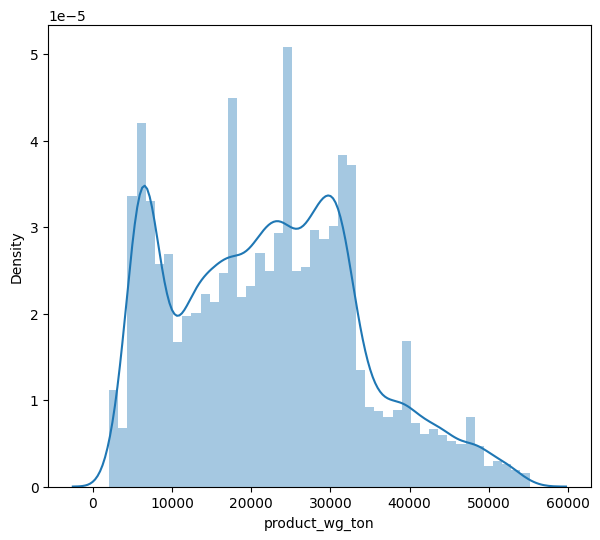

In [100]:
sns.distplot(df['product_wg_ton'])

In [104]:
df1

,Location_type,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,zone_East,zone_North,zone_South,zone_West,WH_regional_zone_Zone 1,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6
0,1,0,3,1,2,0,24,0,1,1,91,29,13,0,1,5,15,17115,0,0,0,1,0,0,0,0,0,1
1,0,2,0,0,4,1,47,0,0,1,210,31,4,0,1,3,17,5074,0,1,0,0,0,0,0,0,1,0
2,0,1,1,0,4,1,64,0,0,0,161,37,17,0,1,6,22,23137,0,0,1,0,0,1,0,0,0,0
3,0,1,7,4,2,0,50,0,0,0,103,21,17,1,0,3,27,22115,0,1,0,0,0,0,1,0,0,0
4,0,2,3,1,2,1,42,1,0,1,112,25,18,0,4,6,24,24071,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,3,0,4,0,19,0,0,1,142,34,22,1,1,2,30,32093,0,1,0,0,1,0,0,0,0,0
24996,0,1,6,0,4,1,57,0,0,1,130,28,10,0,3,4,18,12114,0,0,0,1,0,1,0,0,0,0
24997,1,2,7,0,2,0,31,1,0,1,147,28,23,0,2,5,25,27080,0,0,1,0,0,0,0,0,1,0
24998,0,0,1,0,2,0,25,0,0,1,60,25,18,0,1,6,30,25093,0,1,0,0,1,0,0,0,0,0


In [105]:
x=df1.drop(columns='product_wg_ton')
y=df['product_wg_ton']

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [108]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(20000, 27)
(5000, 27)
(20000,)
(5000,)


In [109]:
import statsmodels.api as sma

In [110]:
xtrain_con=sma.add_constant(xtrain)

In [111]:
model=sma.OLS(ytrain,xtrain_con).fit()

In [112]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 3.382e+04
Date:                Wed, 08 Jan 2025   Prob (F-statistic):               0.00
Time:                        00:06:22   Log-Likelihood:            -1.7790e+05
No. Observations:               20000   AIC:                         3.558e+05
Df Residuals:                   19974   BIC:                         3.561e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1107.7172     72.134     15.356      0.000     966.329    1249.105
Location_type                 -111.3860     45.732     -2.436      0.015    -201.025     -21.747
WH_capacity_size               -21.3086     25.190     -0.846      0.398     -70.684      28.066
num_refill_req_l3m              -0.6851      4.987     -0.137      0.891     -10.460       9.089
transport_issue_l1y           -303.5719     10.565    -28.735      0.000    -324.279    -282.864
Competitor_in_mkt               -9.0612     12.252     -0.740      0.460     -33.076      14.954
wh_owner_type                  -15.1267     26.009     -0.582      0.561     -66.107      35.854
distributor_num                  1.6149      0.778      2.077      0.038       0.091       3.139
flood_impacted                  -2.5412     43.429     -0.059      0.953     -87.666      82.583
flood_proof                     79.4938     55.710      1.427      0.154     -29.702     188.689
electric_supply                  2.9175     28.695      0.102      0.919     -53.327      59.162
dist_from_hub                    0.2940      0.199      1.475      0.140      -0.097       0.685
workers_num                      0.1867      1.748      0.107      0.915      -3.239       3.613
storage_issue_reported_l3m    1254.7774      1.516    827.428      0.000    1251.805    1257.750
temp_reg_mach                  847.6092     29.515     28.718      0.000     789.758     905.460
approved_wh_govt_certificate  -103.0148      9.415    -10.942      0.000    -121.468     -84.561
wh_breakdown_l3m              -236.7682      8.044    -29.436      0.000    -252.534    -221.002
govt_check_l3m                   0.0204      1.671      0.012      0.990      -3.255       3.296
zone_East                      230.9128     82.895      2.786      0.005      68.432     393.394
zone_North                     316.9947     31.566     10.042      0.000     255.124     378.866
zone_South                     256.8235     33.397      7.690      0.000     191.362     322.285
zone_West                      302.9862     32.533      9.313      0.000     239.218     366.754
WH_regional_zone_Zone 1        222.7569     47.990      4.642      0.000     128.693     316.821
WH_regional_zone_Zone 2        205.9777     35.292      5.836      0.000     136.802     275.154
WH_regional_zone_Zone 3        168.1366     36.202      4.644      0.000      97.178     239.095
WH_regional_zone_Zone 4        167.5637     31.859      5.260      0.000     105.117     230.010
WH_regional_zone_Zone 5        164.9359     40.059      4.117      0.000      86.417     243.455
WH_regional_zone_Zone 6        178.3464     26.855      6.641      0.000     125.709     230.984
============================================================================

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [115]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
print(lr.score(xtrain,ytrain))
print(lr.score(xtest,ytest))

0.9769227675235443
0.9781015030897108


In [116]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
rf=RandomForestRegressor()

In [119]:
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [120]:
print(rf.score(xtrain,ytrain))
print(rf.score(xtest,ytest))

0.9990308027286591
0.9934002597816146
